In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
logH = np.genfromtxt('logH.txt')
logW = np.genfromtxt('logW.txt')
S_ipk = np.genfromtxt('S_ipk.txt')
S_pjk = np.genfromtxt('S_pjk.txt')
X_full = np.genfromtxt('X_full.txt')
X_orig = np.genfromtxt('X_orig.txt')
X_orig[np.isnan(X_orig)] = 0

print(X_full.max())
print(S_ipk.shape)

90.0
(943, 18)


In [395]:
movies = pd.read_csv('u.item', delimiter='|', header=None, usecols=[0, 1, 2], names=['ID', 'Movie', 'Date']).set_index('ID')

In [396]:
users = pd.read_csv('u.user', delimiter='|', header=None, usecols=[0, 1, 2, 3], names=['ID', 'Age', 'Gender', 'Job']).set_index('ID')

In [593]:
#S_pjk = S_pjk / S_pjk.sum()
topic = S_ipk[:, 6]
idx = topic.argsort()[-10:][::-1]
#idx = np.where(topic > np.percentile(topic, 99))[0]
print(idx)

for user_id in idx:
    print(users.loc[user_id + 1])

[278 275 404 285 471 290 550 681 434 806]
Age               33
Gender             M
Job       programmer
Name: 279, dtype: object
Age            21
Gender          M
Job       student
Name: 276, dtype: object
Age               22
Gender             F
Job       healthcare
Name: 405, dtype: object
Age            27
Gender          M
Job       student
Name: 286, dtype: object
Age            24
Gender          M
Job       student
Name: 472, dtype: object
Age            19
Gender          M
Job       student
Name: 291, dtype: object
Age               25
Gender             M
Job       programmer
Name: 551, dtype: object
Age               23
Gender             M
Job       programmer
Name: 682, dtype: object
Age             24
Gender           M
Job       engineer
Name: 435, dtype: object
Age               41
Gender             F
Job       healthcare
Name: 807, dtype: object


11 - scifi
6 - horror
3 - drama/crime
9 - adventure

In [552]:
#S_pjk = S_pjk / S_pjk.sum()
topic_mat = mat# / S_pjk.sum(axis=1)[:, None]
topic = topic_mat[:, 10]
#idx = np.where(topic > np.percentile(topic, 99))[0]
idx = topic.argsort()[-50:][::-1]

for movie_id in idx:
    print(movies.loc[movie_id + 1])

Movie    Usual Suspects, The (1995)
Date                    14-Aug-1995
Name: 12, dtype: object
Movie    Casablanca (1942)
Date           01-Jan-1942
Name: 483, dtype: object
Movie    Schindler's List (1993)
Date                 01-Jan-1993
Name: 318, dtype: object
Movie    GoodFellas (1990)
Date           01-Jan-1990
Name: 182, dtype: object
Movie    Citizen Kane (1941)
Date             01-Jan-1941
Name: 134, dtype: object
Movie    Three Colors: Red (1994)
Date                  01-Jan-1994
Name: 59, dtype: object
Movie    Princess Bride, The (1987)
Date                    01-Jan-1987
Name: 173, dtype: object
Movie    Brazil (1985)
Date       01-Jan-1985
Name: 175, dtype: object
Movie    Wizard of Oz, The (1939)
Date                  01-Jan-1939
Name: 132, dtype: object
Movie    Raising Arizona (1987)
Date                01-Jan-1987
Name: 238, dtype: object
Movie    Vertigo (1958)
Date        01-Jan-1958
Name: 479, dtype: object
Movie    Dr. Strangelove or: How I Learned to Stop Worr..

## Document-Topic Distribution

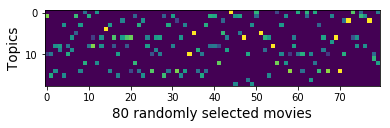

In [32]:
mat = S_pjk.copy()
k = 2
for row in mat:
    sort_idx = np.argsort(row)[::-1]
    mask = np.ones(len(row), dtype=bool)
    mask[sort_idx[:k]] = False
    row[mask] = 0

#mat[mat < 150] = 0
idx = np.arange(1682)
shuffle(idx)
idx = idx[:80]
fig = plt.figure()

mat_show = mat[idx, :].transpose().copy()
# normalize each movie column so that topics are visible
mat_show = mat_show / np.sum(mat_show, axis=0)

plt.imshow(mat_show, cmap='viridis')
plt.xlabel('80 randomly selected movies', fontsize=13.5)
plt.ylabel('Topics', fontsize=13.5);

fig.savefig('figure/movie_topic_mat.eps', format='eps', bbox_inches='tight')

## User-Topic Distribution

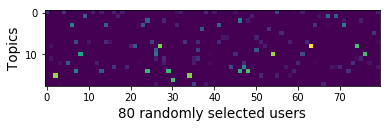

In [39]:
user_mat = S_ipk.copy()
idx = np.arange(943)
shuffle(idx)
idx = idx[:80]

fig = plt.figure()
plt.imshow(user_mat[idx, :].T)
plt.xlabel('80 randomly selected users', fontsize=13.5)
plt.ylabel('Topics', fontsize=13.5);
fig.savefig('figure/user_topic_mat.eps', format='eps', bbox_inches='tight')

In [635]:
topic_mat = mat

In [636]:
# horror
scifi = topic_mat[:, 6]
idx = scifi.argsort()[-10:][::-1]
for movie_id in idx:
    print(movies.loc[movie_id + 1]['Movie'])

Silence of the Lambs, The (1991)
Shining, The (1980)
Psycho (1960)
Cape Fear (1991)
Jaws (1975)
Nightmare on Elm Street, A (1984)
Fugitive, The (1993)
Carrie (1976)
Aliens (1986)
Omen, The (1976)


In [639]:
# crime (kinda noisy)
scifi = topic_mat[:, 3]
idx = scifi.argsort()[-30:][::-1]
for movie_id in idx:
    print(movies.loc[movie_id + 1]['Movie'])

Raiders of the Lost Ark (1981)
Casablanca (1942)
Schindler's List (1993)
Star Wars (1977)
Rear Window (1954)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
Silence of the Lambs, The (1991)
Usual Suspects, The (1995)
North by Northwest (1959)
Graduate, The (1967)
Citizen Kane (1941)
Psycho (1960)
Sting, The (1973)
Vertigo (1958)
Godfather, The (1972)
Godfather: Part II, The (1974)
Amadeus (1984)
Princess Bride, The (1987)
Cool Hand Luke (1967)
One Flew Over the Cuckoo's Nest (1975)
Blade Runner (1982)
2001: A Space Odyssey (1968)
Apocalypse Now (1979)
It's a Wonderful Life (1946)
Pulp Fiction (1994)
Clockwork Orange, A (1971)
Fugitive, The (1993)
Shawshank Redemption, The (1994)
Groundhog Day (1993)
M*A*S*H (1970)


In [655]:
# horror
topic = S_ipk[:, 6]
idx = topic.argsort()[-10:][::-1]

for user_id in idx:
    print(users.loc[user_id + 1])

Age               33
Gender             M
Job       programmer
Name: 279, dtype: object
Age            21
Gender          M
Job       student
Name: 276, dtype: object
Age               22
Gender             F
Job       healthcare
Name: 405, dtype: object
Age            27
Gender          M
Job       student
Name: 286, dtype: object
Age            24
Gender          M
Job       student
Name: 472, dtype: object
Age            19
Gender          M
Job       student
Name: 291, dtype: object
Age               25
Gender             M
Job       programmer
Name: 551, dtype: object
Age               23
Gender             M
Job       programmer
Name: 682, dtype: object
Age             24
Gender           M
Job       engineer
Name: 435, dtype: object
Age               41
Gender             F
Job       healthcare
Name: 807, dtype: object


In [654]:
# crime
topic = S_ipk[:, 3]
idx = topic.argsort()[-10:][::-1]

for user_id in idx:
    print(users.loc[user_id + 1])

Age             61
Gender           M
Job       engineer
Name: 934, dtype: object
Age           33
Gender         M
Job       artist
Name: 381, dtype: object
Age           39
Gender         M
Job       artist
Name: 840, dtype: object
Age                  44
Gender                M
Job       administrator
Name: 666, dtype: object
Age             46
Gender           M
Job       engineer
Name: 848, dtype: object
Age              42
Gender            M
Job       executive
Name: 6, dtype: object
Age             30
Gender           M
Job       engineer
Name: 664, dtype: object
Age             51
Gender           M
Job       educator
Name: 85, dtype: object
Age             38
Gender           M
Job       engineer
Name: 233, dtype: object
Age          32
Gender        M
Job       other
Name: 815, dtype: object
